In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 

In [20]:
data=pd.read_csv("한국문화컨텐츠 선호도 조사.csv")

In [3]:
data

,POPULAR_DGREE_CN,ALL_TOTAL_CO,MALE_RATE,FEMALE_RATE,ALL_N10S_RATE,ALL_N20S_RATE,ALL_N30S_RATE,ALL_N40S_RATE,ALL_N50S_RATE,REPRT_YEAR_CN,EXAMIN_COUNTRY_NM,CNTNTS_URL
0,대중적 인기,34,34.0,34.8,32.0,35.2,32.8,38.5,33.3,2020,중국,드라마
1,보통 인기,39,36.4,40.8,35.2,40.8,44.0,33.7,38.1,2020,중국,드라마
2,소수 마니아 인기,23,26.4,20.4,28.0,21.6,20.8,23.1,23.8,2020,중국,드라마
3,거의 이용 안함,4,3.2,4.0,4.8,2.4,2.4,4.8,4.8,2020,중국,드라마
4,대중적 인기,33,30.8,34.4,32.0,38.4,31.2,27.9,33.3,2020,중국,예능
...,...,...,...,...,...,...,...,...,...,...,...,...
3621,이용하는 사람이 거의 없다,12,14.5,9.5,14.0,9.0,9.0,18.2,0.0,2021,남아공,음식
3622,일부 매니아증에서 인기가 있는 상태,16,17.0,15.0,18.0,16.0,16.0,13.6,16.7,2021,남아공,음식
3623,일부 매니아층 뿐만 아니라 일반인들도 상당수 인지,33,33.5,32.0,31.0,27.0,33.0,35.2,75.0,2021,남아공,음식
3624,일반인에게 널리 알려져 있고 관련 상품이 판매됨,23,20.5,25.5,21.0,25.0,28.0,20.5,0.0,2021,남아공,음식


In [21]:
#아시아국가와 비아시아국가로 데이터를 분류하여 각 데이터의 년도별 선호도 추이를 확인해봄
data=data[(data["POPULAR_DGREE_CN"]=="대중적 인기")|(data["POPULAR_DGREE_CN"]=="일반인에게 널리 인기 있고 관련 상품의 판매가 원활")]

#년도별로 컨텐츠 분류가 상이하여서 공통된 부분 추출
data=data[(data["CNTNTS_URL"]=="드라마")|(data["CNTNTS_URL"]=="예능")|(data["CNTNTS_URL"]=="영화")|(data["CNTNTS_URL"]=="음악")|(data["CNTNTS_URL"]=="애니메이션")|
          (data["CNTNTS_URL"]=="도서/만화")|(data["CNTNTS_URL"]=="웹툰")|(data["CNTNTS_URL"]=="게임")|(data["CNTNTS_URL"]=="패션")|(data["CNTNTS_URL"]=="뷰티")]
data=data[["EXAMIN_COUNTRY_NM","CNTNTS_URL","ALL_TOTAL_CO","MALE_RATE","FEMALE_RATE","REPRT_YEAR_CN"]]

data.reset_index(drop=True,inplace=True)
data = data.astype({'REPRT_YEAR_CN':'int64'})
data

,EXAMIN_COUNTRY_NM,CNTNTS_URL,ALL_TOTAL_CO,MALE_RATE,FEMALE_RATE,REPRT_YEAR_CN
0,중국,드라마,34,34.0,34.8,2020
1,중국,예능,33,30.8,34.4,2020
2,중국,영화,32,30.0,33.6,2020
3,중국,음악,33,33.2,33.2,2020
4,중국,애니메이션,26,26.8,24.8,2020
...,...,...,...,...,...,...
471,남아공,애니메이션,13,10.5,14.5,2021
472,남아공,도서/만화,9,7.0,10.5,2021
473,남아공,웹툰,11,9.5,13.0,2021
474,남아공,패션,18,14.5,22.0,2021


In [23]:
#아시아를 기준으로 데이터 분류
data_asia=data[(data["EXAMIN_COUNTRY_NM"]=="중국")|(data["EXAMIN_COUNTRY_NM"]=="일본")|(data["EXAMIN_COUNTRY_NM"]=="대만")|(data["EXAMIN_COUNTRY_NM"]=="태국")|
               (data["EXAMIN_COUNTRY_NM"]=="인도네시아")|(data["EXAMIN_COUNTRY_NM"]=="말레이시아")|(data["EXAMIN_COUNTRY_NM"]=="인도")|(data["EXAMIN_COUNTRY_NM"]=="베트남")|
               (data["EXAMIN_COUNTRY_NM"]=="러시아")]
data

data_asia.reset_index(drop=True,inplace=True)

data_asia

,EXAMIN_COUNTRY_NM,CNTNTS_URL,ALL_TOTAL_CO,MALE_RATE,FEMALE_RATE,REPRT_YEAR_CN
0,중국,드라마,34,34.0,34.8,2020
1,중국,예능,33,30.8,34.4,2020
2,중국,영화,32,30.0,33.6,2020
3,중국,음악,33,33.2,33.2,2020
4,중국,애니메이션,26,26.8,24.8,2020
...,...,...,...,...,...,...
238,러시아,애니메이션,9,8.5,8.5,2021
239,러시아,도서/만화,7,5.0,9.5,2021
240,러시아,웹툰,6,5.0,6.0,2021
241,러시아,패션,10,7.5,12.5,2021


<AxesSubplot:xlabel='CNTNTS_URL', ylabel='ALL_TOTAL_CO'>

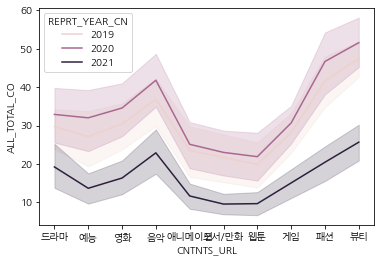

In [24]:
#아시아데이터로 년도별 국가간의 컨텐츠 선호도 차이를 확인하기 위한 lineplot을 그려봄
import matplotlib as mpl
mpl.rcParams['font.family']='NanumGothic'

sns.lineplot(x="CNTNTS_URL",y="ALL_TOTAL_CO",hue="REPRT_YEAR_CN",data=data_asia)

#년도별로 비교해봤을때, 컨텐츠별 국가간의 컨텐츠 선호도의 차이가 있는 것으로 시각적으로 확인된다
#정확하게 알아보기 위해 ANOVA test를 통해 년도별로 컨텐츠 선호도의 차이가 있는지를 알아본다

In [25]:
data_asia_2021=data_asia[data_asia["REPRT_YEAR_CN"]==2021]
data_asia_2021

,EXAMIN_COUNTRY_NM,CNTNTS_URL,ALL_TOTAL_CO,MALE_RATE,FEMALE_RATE,REPRT_YEAR_CN
162,중국,드라마,17,16.8,18.0,2021
163,중국,예능,13,14.4,11.2,2021
164,중국,영화,19,22.0,15.2,2021
165,중국,음악,15,15.6,14.8,2021
166,중국,애니메이션,13,16.8,10.0,2021
...,...,...,...,...,...,...
238,러시아,애니메이션,9,8.5,8.5,2021
239,러시아,도서/만화,7,5.0,9.5,2021
240,러시아,웹툰,6,5.0,6.0,2021
241,러시아,패션,10,7.5,12.5,2021


In [36]:
data_asia_2021=data_asia[data_asia["REPRT_YEAR_CN"]==2021]
data_asia_2020=data_asia[data_asia["REPRT_YEAR_CN"]==2020]
data_asia_2019=data_asia[data_asia["REPRT_YEAR_CN"]==2019]

data_asia_2021.reset_index(drop=True,inplace=True)
data_asia_2020.reset_index(drop=True,inplace=True)
data_asia_2019.reset_index(drop=True,inplace=True)
data_asia_2019

,EXAMIN_COUNTRY_NM,CNTNTS_URL,ALL_TOTAL_CO,MALE_RATE,FEMALE_RATE,REPRT_YEAR_CN
0,중국,드라마,32,37.2,27.6,2019
1,중국,예능,29,30.8,28.0,2019
2,중국,영화,30,36.4,22.8,2019
3,중국,음악,33,35.2,30.4,2019
4,중국,애니메이션,19,20.4,16.8,2019
...,...,...,...,...,...,...
67,러시아,애니메이션,22,19.0,25.5,2019
68,러시아,웹툰,11,8.0,14.5,2019
69,러시아,게임,23,26.0,19.5,2019
70,러시아,패션,26,19.0,32.0,2019


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EXAMIN_COUNTRY_NM  476 non-null    object 
 1   CNTNTS_URL         476 non-null    object 
 2   ALL_TOTAL_CO       476 non-null    int64  
 3   MALE_RATE          476 non-null    float64
 4   FEMALE_RATE        476 non-null    float64
 5   REPRT_YEAR_CN      476 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 22.4+ KB


In [27]:
#ANOVA test의 가정을 만족하는지 확인하기 위해 정규성.독립성.등분산성을 확인해봄
from scipy.stats import shapiro
shapiro(data_asia_2021["ALL_TOTAL_CO"])
#2021데이터는 정규성을 가짐

ShapiroResult(statistic=0.96739262342453, pvalue=0.03681807219982147)

In [28]:
shapiro(data_asia_2020["ALL_TOTAL_CO"])
#2020데이터는 정규성을 가짐

ShapiroResult(statistic=0.9883280992507935, pvalue=0.6082614064216614)

In [29]:
shapiro(data_asia_2019["ALL_TOTAL_CO"])
#2019데이터는 정규성을 가짐

ShapiroResult(statistic=0.9738536477088928, pvalue=0.1386755108833313)

In [30]:
#등분산성을 확인하기 위해 바틀렛 검정을 사
stats.bartlett(
    data_asia_2021["ALL_TOTAL_CO"],
    data_asia_2020["ALL_TOTAL_CO"],
    data_asia_2019["ALL_TOTAL_CO"] )
#p-value 값이 0.05보다 작으므로 등분산성을 만족하지 않는다는 것을 알 수 있다
#등분산성을 만족하지 않으므로 

BartlettResult(statistic=17.997164918576072, pvalue=0.00012358486655800362)

In [31]:
from pingouin import welch_anova
#귀무가설:년도별로 국가간의 선호도 차이는 없다.
#dv:종속변수 between:독립변수
welch_anova(dv="ALL_TOTAL_CO", between="REPRT_YEAR_CN", data=data_asia)
#p-value값이 0.05보다 작으므로 귀무가설을 기각함

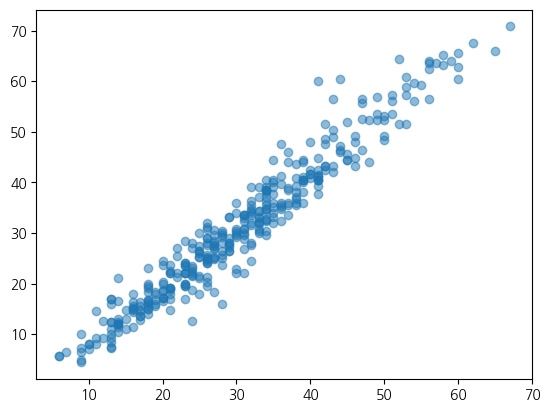

In [31]:
#선호도 총합에 여성과 남성 중 어떤 성별이 더 많은 영향을 주는지 확인해보기 위해, 여성과 남성을 구분하여 선호도총합간의 상관분석을 실시함
#All-total과 female rate간의 상관관계를 분석해보기위해 산점도를 그려봄
plt.scatter(data["ALL_TOTAL_CO"],data["FEMALE_RATE"], alpha=0.5)
plt.show()
#양의 상관관계가 나타나 보이는 것으로 확인됨

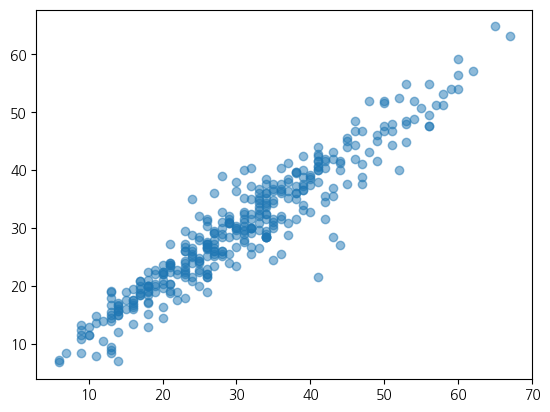

In [32]:
#All-total과 male rate간의 상관관계를 분석해보기위해 산점도를 그려봄
plt.scatter(data["ALL_TOTAL_CO"],data["MALE_RATE"], alpha=0.5)
plt.show()
#양의 상관관계가 나타나는 것으로 확인됨

In [30]:
import scipy.stats as stats
stats.pearsonr(data_asia["ALL_TOTAL_CO"],data_asia["MALE_RATE"])
#p-value값이 0.05보다 작으므로 male_rate는 all_total_co에 밀접한 연관이 있다는 것을 확인할 수 있음

(0.9558102640580238, 2.6737941834143156e-100)

In [33]:
stats.pearsonr(data_asia["ALL_TOTAL_CO"],data_asia["FEMALE_RATE"])
#p-value값이 0.05보다 작으므로 male_rate는 all_total_co에 밀접한 연관이 있다는 것을 확인할 수 있음
#선호도 총합과 여성간의 상관계수값이 선호도 총합과 남성간의 상관계수값보다 더 작으므로, 여성이 남성에 비해 선호도 총합에 더 강햔 양적관계를 가지고 있다는 것을 알 수 있다.

(0.9714280438362046, 1.6668706635889613e-117)